# IS 670 HW 2: Decision Tree

---

This data set contains information of cars purchased at the Auction.  

- We will use this file to predict the quality of buying decisions and visualize decision processes.  

## **VARIABLE DESCRIPTIONS** 

- **Auction**: Auction provider at which the  vehicle was purchased  

- **Color**: Vehicle Color  

- **IsBadBuy**: Identifies if the kicked vehicle was an avoidable purchase  

- **MMRCurrentAuctionAveragePrice**: Acquisition price for this vehicle in average condition as of current day  

- **Size**: The size category of the vehicle (Compact, SUV, etc.)  

- **TopThreeAmericanName**:Identifies if the manufacturer is one of the top three American manufacturers  

- **VehBCost**: Acquisition cost paid for the vehicle at time of purchase  

- **VehicleAge**: The Years elapsed since the manufacturer's year  

- **VehOdo**: The vehicles odometer reading  

- **WarrantyCost**: Warranty price (term=36month  and millage=36K)  

- **WheelType**: The vehicle wheel type description (Alloy, Covers)  


Target variable: **IsBadBuy**

## 1. Import and clean data

In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
# Read data 
# Assign path on basis of dataset location (if csv file and ipynb file both are in the same folder then path will be car_kick.csv)
car_kick = pd.read_csv('car_kick.csv')
car_kick

In [ ]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']

# Filter DF for columns picked
car_kick_desired = car_kick [desired_columns]

In [ ]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy

# Create a copy of DF. This is necassary so you don't manipuate the original DF. You want to keep the original untouched so you can reference raw DF again if needed.
carAuction = car_kick_desired.copy()

# Convert to string first
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('string')

# Replace numbers with words
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({'0': 'No', '1': 'Yes'})

In [ ]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [ ]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [ ]:
# Examine variable type
carAuction.dtypes

Auction                                  object
Color                                    object
IsBadBuy                         string[python]
MMRCurrentAuctionAveragePrice             int64
Size                                     object
TopThreeAmericanName                     object
VehBCost                                  int64
VehicleAge                                int64
VehOdo                                    int64
WarrantyCost                              int64
WheelType                                object
dtype: object

### Convert to Categorical Data

The categorical data type is useful in the following cases:

- A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.

- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.

- As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

**string is best for dynamic text values that need free modification.**  

**category is best for repeated values, providing memory efficiency, faster computation, and ordering capabilities.**

In [ ]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [ ]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

## 2. Partition the data set for Decision Tree model

In [ ]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction.head()

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,No,3688,3680,4,89127,983,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,No,6868,7170,3,71271,1974,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,No,7801,7670,2,83338,2152,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
4,No,7355,7165,2,58698,1500,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
# Examine the porportion of target variable for data set
# Normalize provides the relative frequencies of unique values
y = carAuction['IsBadBuy']
print(y.value_counts(normalize=True) * 100)

IsBadBuy
No     90.453944
Yes     9.546056
Name: proportion, dtype: float64


See the proportion? 10% of people made a bad buy and less than 90% made a good buy.

Adding a model on top of the imbalance creates Model Bias toward the Majority Class.

- Can learn to always predict the majority because it minimizes the loss function
- Accuracy metric will be misleading

**Example: Fraud Detection**  

Suppose you are building a fraud detection model, and 90% of transactions are legitimate while 10% are fraudulent.
If the model always predicts "legitimate", it will be 90% accurate but will never detect fraud, which is the actual goal.

In [ ]:
# Partition the data
X = carAuction.drop(['IsBadBuy'],axis=1)

# Show predictors
print(X.columns)

Index(['MMRCurrentAuctionAveragePrice', 'VehBCost', 'VehicleAge', 'VehOdo',
       'WarrantyCost', 'Auction_MANHEIM', 'Auction_OTHER', 'Color_BEIGE',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN',
       'Color_GREY', 'Color_MAROON', 'Color_ORANGE', 'Color_OTHER',
       'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE',
       'Color_YELLOW', 'Size_'LARGE TRUCK'', 'Size_'MEDIUM SUV'',
       'Size_'SMALL SUV'', 'Size_'SMALL TRUCK'', 'Size_COMPACT',
       'Size_CROSSOVER', 'Size_LARGE', 'Size_MEDIUM', 'Size_SPECIALTY',
       'Size_SPORTS', 'Size_VAN', 'TopThreeAmericanName_FORD',
       'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER',
       'WheelType_Covers', 'WheelType_Special'],
      dtype='object')


### Train Test & Split Data
Create a training and testing dataset.

Note - Normally, you will create a validation set as well. To keep it simple, we will only create 2 datasets (Training and Testing).  

**Split Example**  

```python
# Split 70 Training and 30 "TEST"
X_train, X_temp, Y_train, Y_temp = train_test_split(predictors, target, test_size=.3)

# Using the 30 TEST dataset, split this in half, so we can use 15% for testing and 15% for validation
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=.5)
```

- X_train, Y_train  --> Used for training the model ✅
- X_val, Y_val      --> Used for hyperparameter tuning (validation set) ✅
- X_test, Y_test    --> Used for final evaluation (test set) ✅  

In [ ]:
# Create Training and Testing Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Train %: {x_train.shape[0] / len(X): .0%}')
print(f'Test % : {x_test.shape[0] / len(X): .0%}')
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Train %:  70%
Test % :  30%
(47047, 38) (47047,) (20164, 38) (20164,)


# Imbalance of Target Variable **IsBadBuy**

Lets balance this target variable artificially with minority and majority sampling

In [ ]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = carAuction.copy()

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [ ]:
# Examine the porportion of target variable for dataset
balanced_data['IsBadBuy'].value_counts(normalize=True)


IsBadBuy
No     0.5
Yes    0.5
Name: proportion, dtype: float64

In [ ]:
# renaming train and test
x_train,y_train = predictors_train,target_train

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(12832, 38) (12832,) (20164, 38) (20164,)


## 3. Decision Tree model prediction

In [ ]:
# Build a decision tree model on training data with max_depth = 2    
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 2)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 12832\nvalue = [6416, 6416]\nclass = No'),
 Text(0.25, 0.5, 'VehicleAge <= 2.5\nentropy = 0.963\nsamples = 6579\nvalue = [4028, 2551]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.83\nsamples = 1438\nvalue = [1061, 377]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.983\nsamples = 5141\nvalue = [2967, 2174]\nclass = No'),
 Text(0.75, 0.5, 'VehBCost <= 5277.5\nentropy = 0.959\nsamples = 6253\nvalue = [2388, 3865]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.895\nsamples = 2707\nvalue = [844, 1863]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.988\nsamples = 3546\nvalue = [1544, 2002]\nclass = Yes')]

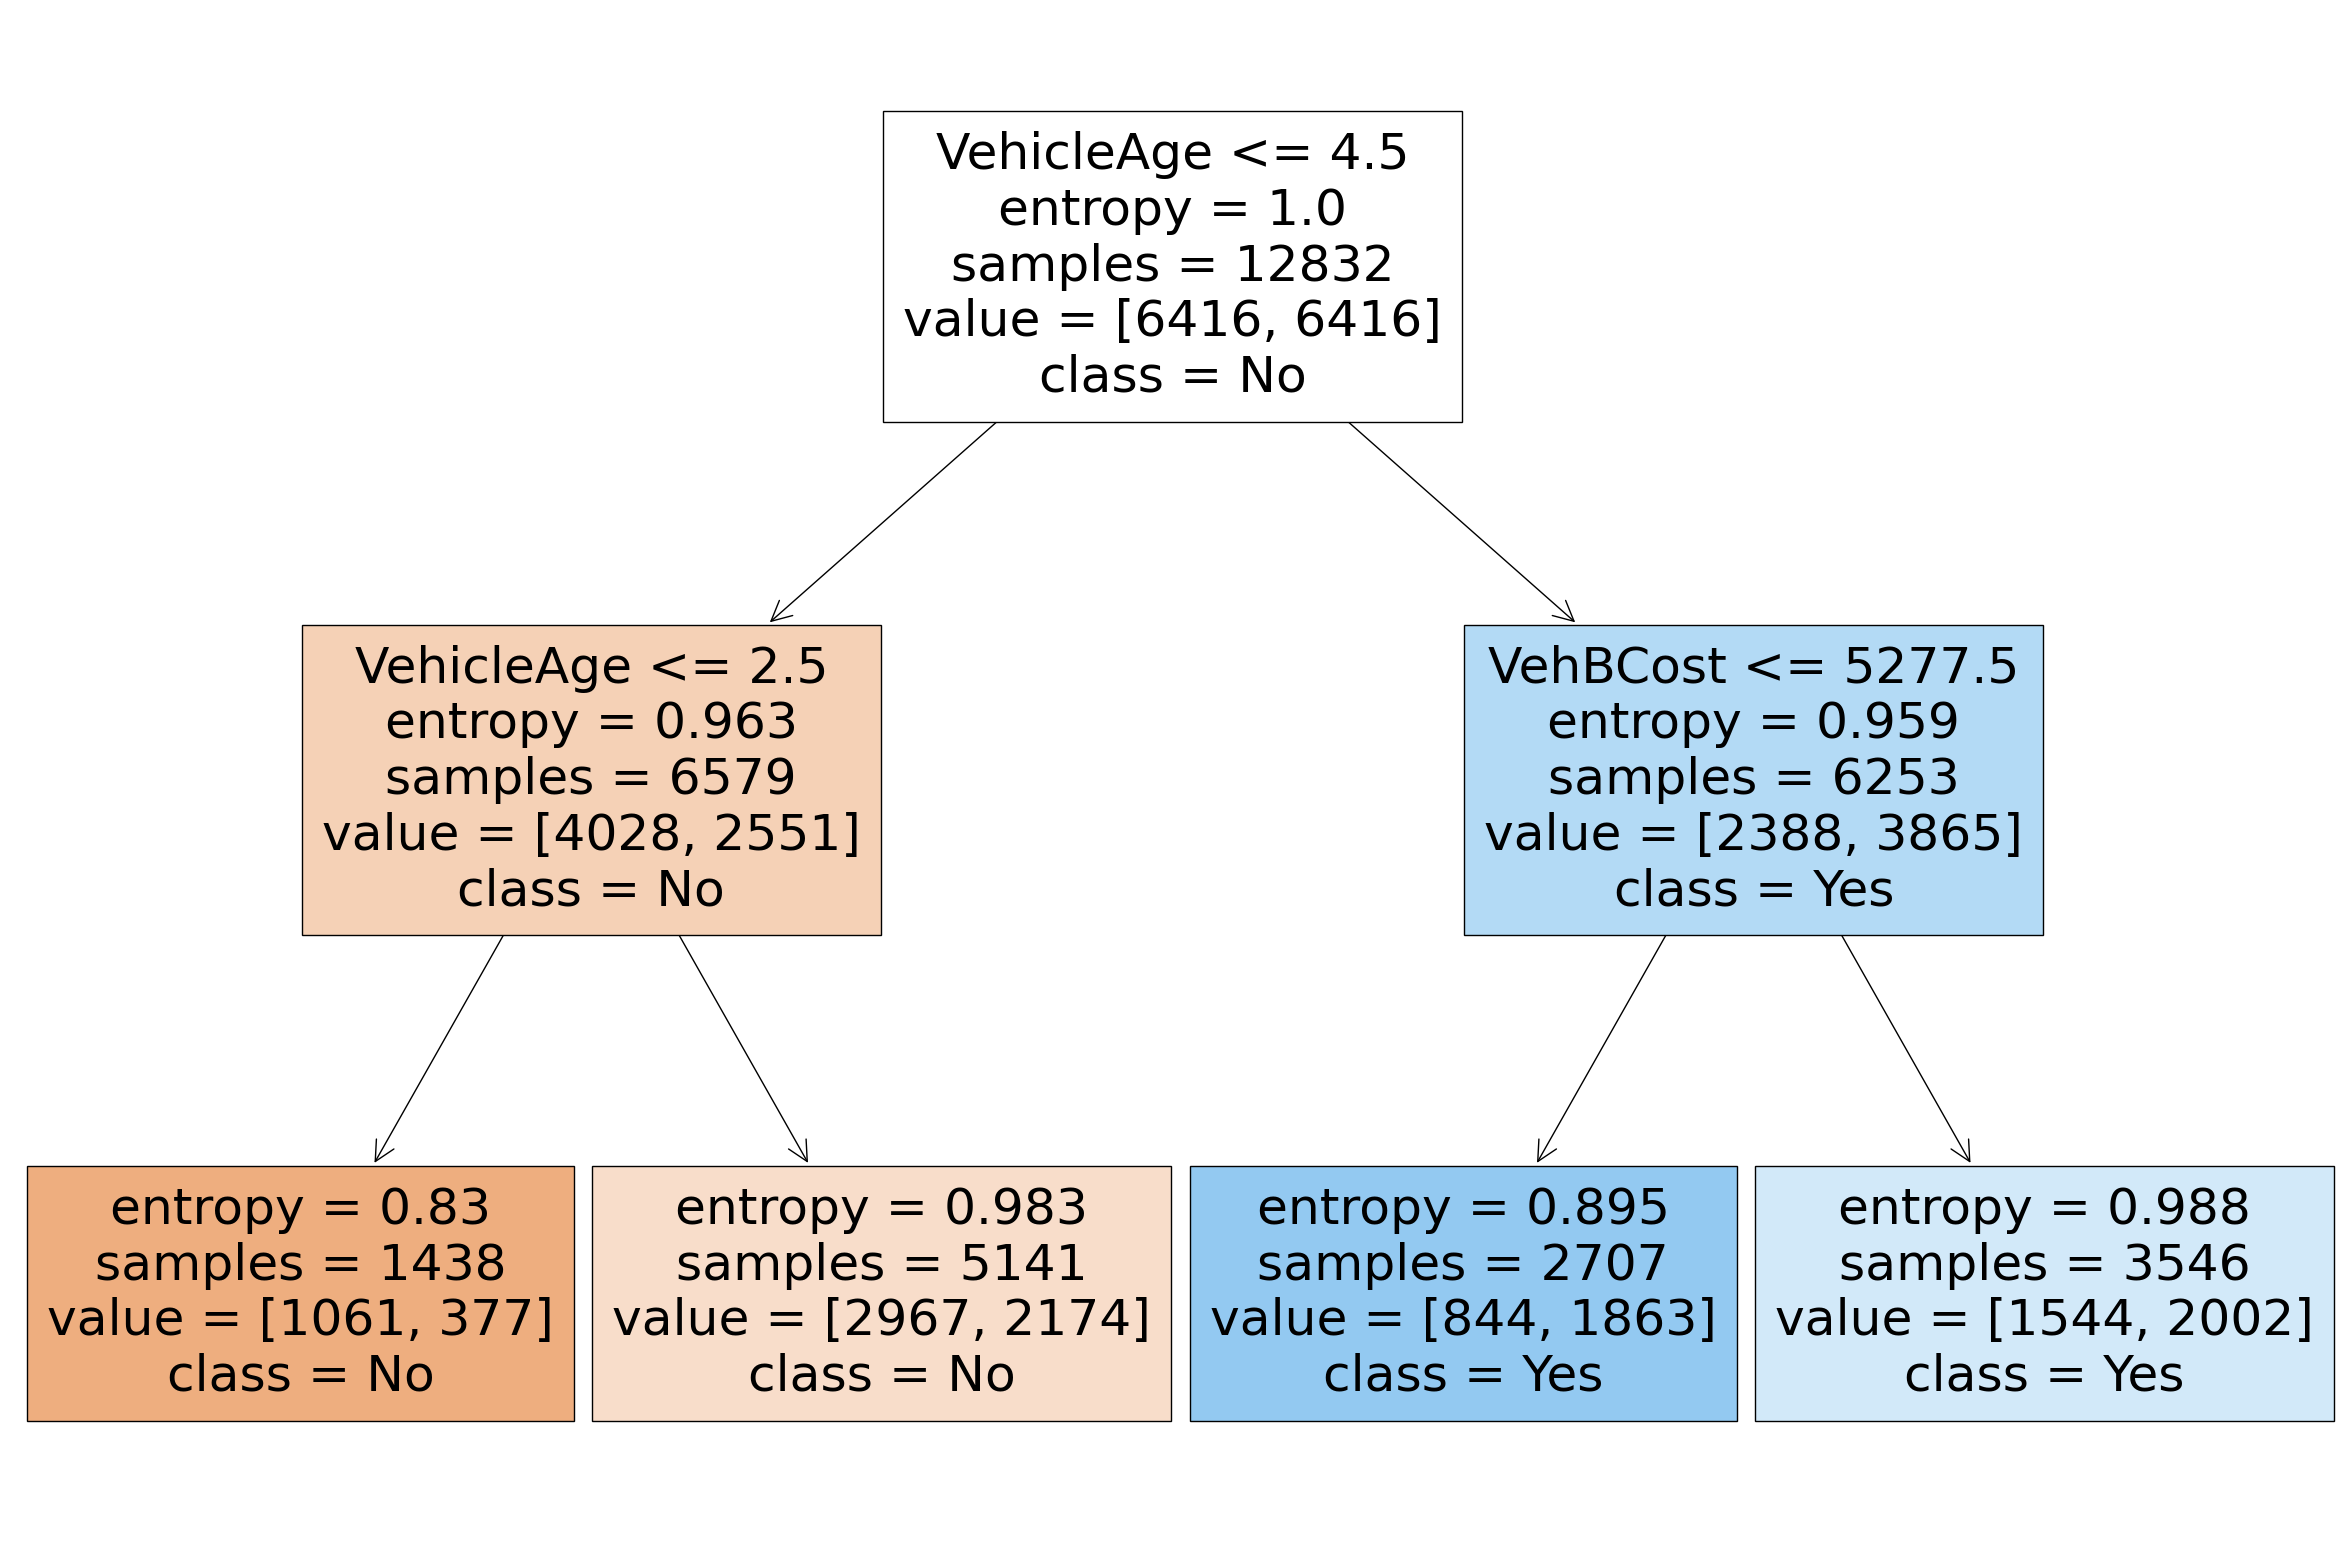

In [ ]:
# Plot the tree 
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
# Text version of decision tree 
print(tree.export_text(model, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehBCost <= 5277.50
|   |   |--- class: Yes
|   |--- VehBCost >  5277.50
|   |   |--- class: Yes



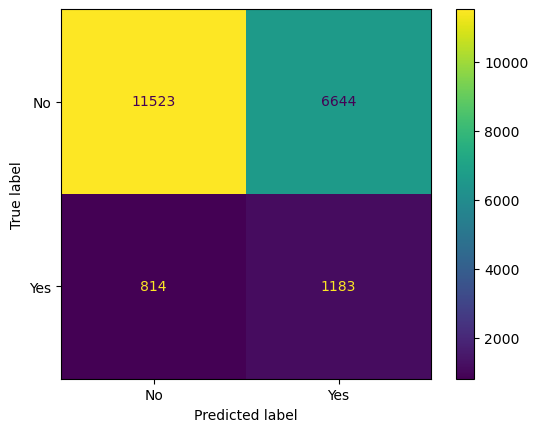

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix 
cm = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score 
print(classification_report(y_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.63      0.76     18167
         Yes       0.15      0.59      0.24      1997

    accuracy                           0.63     20164
   macro avg       0.54      0.61      0.50     20164
weighted avg       0.86      0.63      0.70     20164

